In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns; sns.set_theme()
from sklearn import tree
import graphviz
from dtreeviz.trees import dtreeviz
from sklearn.naive_bayes import GaussianNB
import scipy

# Seeds Dataset

In [67]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)
df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
feature_nms = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
class_nms = ['Kama','Rosa','Canadian']

df_1 = df[df["target"]==1]
df_2 = df[df["target"]==2]
df_3 = df[df["target"]==3]
thres_dict_1 = {"perimeter":[16,13],"area":[16.8,12],"length_kernel":[6,5],"length_of_kernel_groove":[5.75,4],"asymmetry_coeff":[6,0]}
thres_dict_2 = {"length_kernel":[6.75,5.50],"length_of_kernel_groove":[7,5.5]}
thres_dict_3 = {"asymmetry_coeff":[8,2]}

for k in list(thres_dict_1.keys()):
    for i in list(df_1.index):
        if df_1.loc[i,k] > thres_dict_1[k][0] or df_1.loc[i,k] < thres_dict_1[k][1]:
            df_1.loc[i,k] = np.nan

for k in list(thres_dict_2.keys()):
    for i in list(df_2.index):
        if df_2.loc[i,k] > thres_dict_2[k][0] or df_2.loc[i,k] < thres_dict_2[k][1]:
            df_2.loc[i,k] = np.nan

for k in list(thres_dict_3.keys()):
    for i in list(df_3.index):
        if df_3.loc[i,k] > thres_dict_3[k][0] or df_3.loc[i,k] < thres_dict_3[k][1]:
            df_3.loc[i,k] = np.nan

df = pd.concat([df_1,df_2,df_3])
df = df.dropna()


feature_cols = list(df.columns)
target_col = feature_cols.pop()
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)

for i in list(df_feat.columns):
    df_feat[i] = scipy.stats.zscore(df_feat.loc[:,i].values)
df_norm = pd.concat([df_feat,df_target],axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


Gaussian Naive Bayes Test Accuracy at var_smoothing of 1e-1 is... 0.9743589743589743


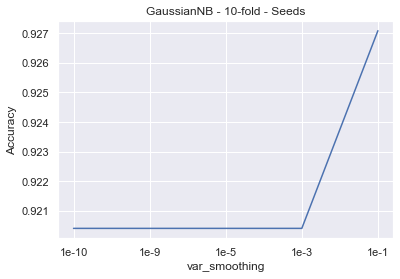

In [68]:
#GaussianNB
kf = KFold(n_splits=10)
performance_dict = {}
var_sm_list = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
for var_sm in var_sm_list:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GaussianNB(var_smoothing=var_sm)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[var_sm] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("GaussianNB - 10-fold - Seeds")
plt.plot([1,2,3,4,5], accuracies)
plt.xticks([1,2,3,4,5],['1e-10','1e-9','1e-5','1e-3','1e-1'])
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

clf = GaussianNB(var_smoothing=0.1)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
GNB_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Gaussian Naive Bayes Test Accuracy at var_smoothing of 1e-1 is...", GNB_Test_Acc)


## Performance Comparison for seeds dataset
### With seeds dataset, the performance of GaussianNB in a normalized and preprocessed dataset is on par with the best performance obtained from decision tree.

In [59]:
var = pd.DataFrame()
var[0]=(list(list(clf.sigma_)[0]))
var[1]=(list(list(clf.sigma_)[1]))
var[2]=(list(list(clf.sigma_)[2]))
var.columns = ["Kama","Rosa","Canadian"]
var.index = list(X_train.columns)
var.T

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove
Kama,2.093655,1.186340,0.932736,0.975169,0.962989,2.358810,0.988020
Rosa,2.812311,1.258708,0.932682,0.986350,0.968099,2.270398,0.977529
Canadian,1.427511,1.049570,0.932859,0.950854,0.950531,2.165284,0.955990


In [60]:
mean = pd.DataFrame()
mean[0]=(list(list(clf.theta_)[0]))
mean[1]=(list(list(clf.theta_)[1]))
mean[2]=(list(list(clf.theta_)[2]))
mean.columns = ["Kama","Rosa","Canadian"]
mean.index = list(X_train.columns)
mean.T

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove
Kama,14.319783,14.290435,0.879998,5.505478,3.243739,2.734070,5.057370
Rosa,18.525690,16.226897,0.882812,6.189690,3.691069,3.554259,6.059276
Canadian,11.800417,13.210000,0.849048,5.219792,2.843042,4.727958,5.109563


## Inferring from Learned Parameters
### Above are the learned parameters from GaussianNB for seeds dataset
### Focusing on the mean and variance of "length_of_kernel_groove", the mean value of "Rosa" seems to be well separated from the other two classes. In addition to this, the variance of this feature is small. This essentially means that the distribution of "Rosa" in terms of "length_of_kernel_groove" is well separated from the other classes. The same can be observed in Decision tree as well, as the first feature Decision tree splits on is "length_of_kernel_groove". Well separated distributions with less spread is highly suitable for separation. "Rosa" class in the feature has a mean of 6.059 and a variance of 0.977. (6.059 - (0.977 / 2)) = 5.57 which happens to be the split threshold point chosen by Decision Tree.

### Similar nature can be seen in features like "area", "perimeter" etc. In feature "asymmetric_coeff", the means of "Kama" and "Canadian" are far apart. This makes it a desirable feature to consider for separating between these two classes. Similar behaviour is observed in Decision Tree where this feature is used in lower levels to separate "Kama" from "Canadian". Thus, from the learned parameters of Naive Bayes, we are able to make crucial inference on which feature would be suitable for classfying a particular.

Gaussian Naive Bayes Test Accuracy at var_smoothing of 1e-1 is... 0.6731095286537809


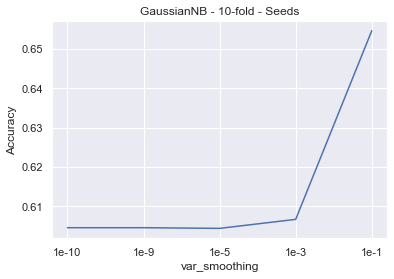

In [45]:
df = pd.read_csv('covid_train.csv')

def find_mode(df):
    AG = pd.unique(df.Age_Group)
    mode = np.zeros((9,1))
    for i in list(df.loc[:,"Age_Group"].values):
        if str(i)!='nan':
            i = int(i)
            mode[i-1]+=1
    m = np.argmax(mode)
    return m

df['Age_Group'] = df['Age_Group'].replace('<20',1).replace('20s',2).replace('30s',3).replace('40s',4).replace('50s',5).replace('60s',6).replace('70s',7).replace('80s',8).replace('90s',9)
df_oc_fatal = df[df["Outcome1"]=="Fatal"]
df_oc_res = df[df["Outcome1"]=="Resolved"]
df_oc_nres = df[df["Outcome1"]=="Not Resolved"]
df_oc_fatal["Age_Group"]=df_oc_fatal["Age_Group"].replace(np.nan,7)
df_oc_res["Age_Group"]=df_oc_res["Age_Group"].replace(np.nan,1)
df_oc_nres["Age_Group"]=df_oc_nres["Age_Group"].replace(np.nan,1)
df = pd.concat([df_oc_fatal,df_oc_res,df_oc_nres])

df['Age_Group'] = df['Age_Group'].replace('<20',1).replace('20s',2).replace('30s',3).replace('40s',4).replace('50s',5).replace('60s',6).replace('70s',7).replace('80s',8).replace('90s',9)
df['Outcome1']=df['Outcome1'].replace('Resolved',1).replace('Fatal',-1).replace('Not Resolved',0)
df['Outbreak_Related'] = df['Outbreak_Related'].replace('Yes',1).replace(np.nan,0)
df['Client_Gender'] = df['Client_Gender'].replace('UNSPECIFIED',np.nan)
df['Case_AcquisitionInfo']=df['Case_AcquisitionInfo'].replace('TRAVEL','OTHERWISE').replace('NO KNOWN EPI LINK','OTHERWISE').replace('UNSPECIFIED EPI LINK','OTHERWISE')
df = df.dropna()

countries_chosen = ["Toronto", "Mississauga", "Newmarket", "Ottawa", "Whitby", "Windsor", "Thorold", "Hamilton", "Oakville", "Waterloo", "London", "Barrie", "Guelph", "Cornwall", "St. Thomas", "Thunder Bay", "Brockville"]
for country in list(df["Reporting_PHU_City"].unique()):
    if country not in countries_chosen:
        df['Reporting_PHU_City'] = df['Reporting_PHU_City'].replace(country,"Otherwise")

gender_dummy = pd.get_dummies(df.Client_Gender,prefix='Gender')
Case_Aq_dummy = pd.get_dummies(df.Case_AcquisitionInfo,prefix='Case_Aq')
City_dummy = pd.get_dummies(df.Reporting_PHU_City,prefix='City')
drop_clm = ['Reporting_PHU_City','Client_Gender','Case_AcquisitionInfo','Reporting_PHU_Latitude','Reporting_PHU_Longitude']
df = df.drop(columns=drop_clm)
df = pd.concat([df,City_dummy,Case_Aq_dummy],axis=1)

feature_cols = list(df.columns)
target_col = 'Outcome1'
feature_cols.remove(target_col)
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)
class_nms = ['Fatal','Not Resolved','Resolved']

X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

#GaussianNB
kf = KFold(n_splits=10)
performance_dict = {}
var_sm_list = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
for var_sm in var_sm_list:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GaussianNB(var_smoothing=var_sm)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[var_sm] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("GaussianNB - 10-fold - Seeds")
plt.plot([1,2,3,4,5], accuracies)
plt.xticks([1,2,3,4,5],['1e-10','1e-9','1e-5','1e-3','1e-1'])
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

clf = GaussianNB(var_smoothing=0.1)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
GNB_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Gaussian Naive Bayes Test Accuracy at var_smoothing of 1e-1 is...", GNB_Test_Acc)

### In covid dataset as well, the performance on GaussianNB is on par with the Decision tree models. In decision tree, the maximum accuracy reached was 0.675 by Gradient Boosting model which is only slightly more than the test performance of GaussianNB.

In [46]:
var = pd.DataFrame()
var[0]=(list(list(clf.sigma_)[0]))
var[1]=(list(list(clf.sigma_)[1]))
var[2]=(list(list(clf.sigma_)[2]))
var.columns = ["Fatal","Not Resolved","Resolved"]
var.index = list(X_train.columns)
var.T

,Age_Group,Outbreak_Related,City_Barrie,City_Brockville,City_Cornwall,City_Guelph,City_Hamilton,City_London,City_Mississauga,City_Newmarket,...,City_Thorold,City_Thunder Bay,City_Toronto,City_Waterloo,City_Whitby,City_Windsor,Case_Aq_CC,Case_Aq_MISSING INFORMATION,Case_Aq_OB,Case_Aq_OTHERWISE
Fatal,2.006453,0.864612,0.702990,0.689938,0.691683,0.692925,0.717562,0.709978,0.768188,0.752000,...,0.733919,0.685171,0.916749,0.714260,0.729834,0.728234,0.750706,0.753289,0.877569,0.783220
Not Resolved,5.121400,0.850021,0.706840,0.683401,0.690929,0.703943,0.713763,0.706117,0.845619,0.746534,...,0.713999,0.688933,0.908901,0.708281,0.704911,0.705152,0.896699,0.911914,0.831073,0.803513
Resolved,4.775177,0.845908,0.703076,0.683157,0.691974,0.696694,0.709851,0.701611,0.848425,0.763943,...,0.707684,0.684933,0.896027,0.713200,0.726341,0.722628,0.927340,0.818671,0.826907,0.854340


In [47]:
mean = pd.DataFrame()
mean[0]=(list(list(clf.theta_)[0]))
mean[1]=(list(list(clf.theta_)[1]))
mean[2]=(list(list(clf.theta_)[2]))
mean.columns = ["Fatal","Not Resolved","Resolved"]
mean.index = list(X_train.columns)
mean.T

,Age_Group,Outbreak_Related,City_Barrie,City_Brockville,City_Cornwall,City_Guelph,City_Hamilton,City_London,City_Mississauga,City_Newmarket,...,City_Thorold,City_Thunder Bay,City_Toronto,City_Waterloo,City_Whitby,City_Windsor,Case_Aq_CC,Case_Aq_MISSING INFORMATION,Case_Aq_OB,Case_Aq_OTHERWISE
Fatal,7.822154,0.758384,0.022104,0.008638,0.010417,0.011687,0.037602,0.029472,0.096037,0.076474,...,0.055640,0.003811,0.379065,0.034045,0.051067,0.049289,0.074949,0.077998,0.731961,0.115091
Not Resolved,3.943133,0.214775,0.026149,0.002031,0.009647,0.023102,0.033511,0.025387,0.207159,0.070069,...,0.033765,0.007616,0.350089,0.027672,0.024118,0.024372,0.313785,0.360498,0.183295,0.142422
Resolved,3.741327,0.207653,0.022194,0.001786,0.010714,0.015561,0.029337,0.020663,0.211990,0.090816,...,0.027041,0.003571,0.311990,0.032908,0.047194,0.043112,0.436480,0.164286,0.176786,0.222449


## Inferring from Learned Parameters
### Above are the learned parameters from GaussianNB for seeds dataset
### Focusing on the learned  parameters, we can notice that the mean of "Age_Group" feature of "Fatal" class is much apart from the other two classes and has considerable smaller variance too. This makes it a crucial feature to consider for classifying "Fatal" from other outcomes. Similar behaviour is observed in Decision Trees as well, which has chosen to split using "Age_Group" first. "Age_Group" in "Fatal" has a mean of 7.82 and a variance of 2. (7.82 - (2/2)) = 6.82. Decision tree chose to split at 6.5 which is the same as choosing to split at 6.82 since "Age_Group" is ordinal and is encoded with integer values. 

### Similar observations can be made in other crucial features like "Case_Aq_Misssing_Information" whose mean for "Not Resolved" is well distanced from the other two classes. Similarly, Decision Tree also used this feature to make decision between "Not Resolved" and "Resolved". Likewise, we are able to realise the significance of each feature of the data from the learned parameters of GaussianNB.